In [92]:
import pandas
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Load CSV file into memory

In [93]:
data = pandas.read_csv('C:/Users/Saikiran/Desktop/uber/uber-raw-data-apr14.csv')

In [94]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [95]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

# Convert datetime into required format

In [96]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


# Separate the Date Of Month(dom) in Date/Time column

In [97]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [98]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


# Separate the weekday & hour in Date/Time column

In [99]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)


In [100]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis

# Analyze the frequency from date of month

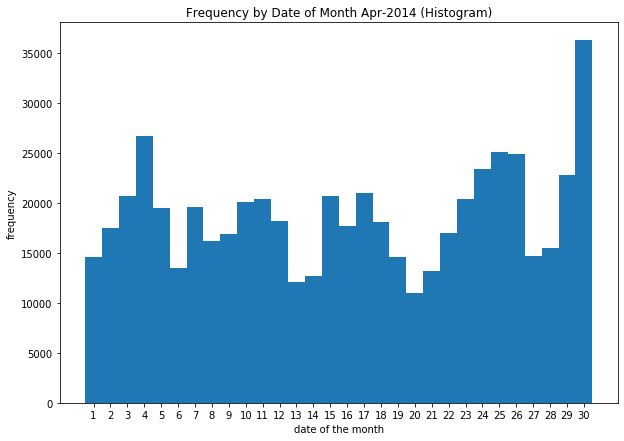

In [101]:
figure(figsize=(10, 7))
hist(data.dom, bins=30, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by Date of Month Apr-2014 (Histogram)')
xticks(range(1,31));

# Grouping dom and frequency values

In [102]:
#for k, rows in data.groupby('dom'):
#    print((k, len(rows)))
 
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

# Sorting the grouped values

In [103]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

# Analyze the frequency for sorted values

Text(0.5, 1.0, 'Frequency by Date of Month Apr-2014 (Bar Graph)')

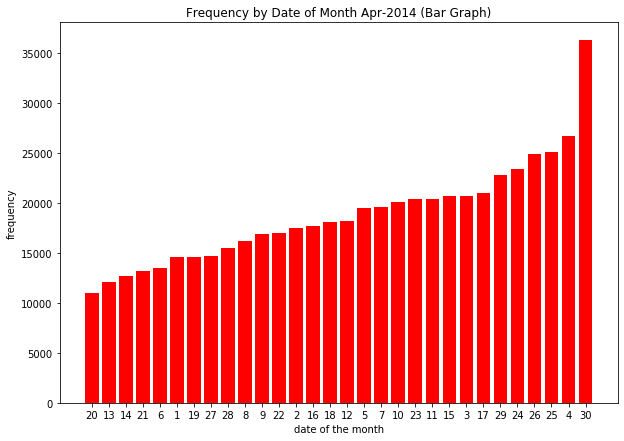

In [104]:
figure(figsize=(10, 7))
bar(range(1, 31), by_date_sorted, color='red')
xticks(range(1,31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by Date of Month Apr-2014 (Bar Graph)')


# Analyze frequency for Every Hour

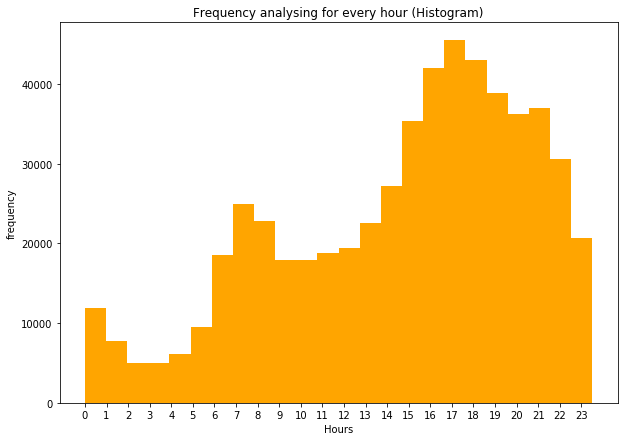

In [105]:
figure(figsize=(10, 7))
hist(data.hour, bins=24, range=(0,23.5), color='orange')
xticks(range(0,24))
xlabel('Hours')
ylabel('frequency')
title('Frequency analysing for every hour (Histogram)');



# Analyze frequency for Every Day

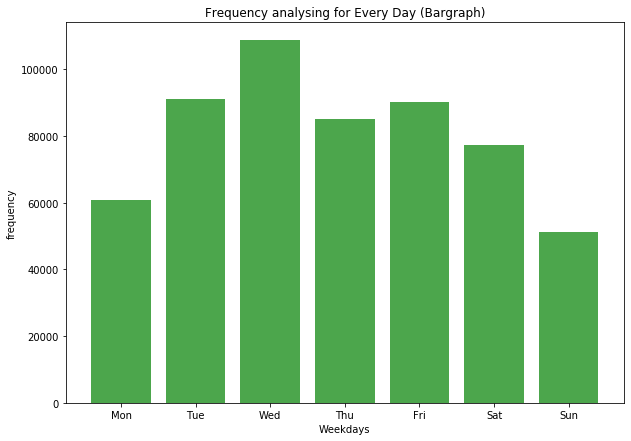

In [108]:
figure(figsize=(10, 7))
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='green', alpha=.7)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
xlabel('Weekdays')
ylabel('frequency')
title('Frequency analysing for Every Day (Bargraph)');


# Analyze frequency for everyday based on hours

In [63]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()


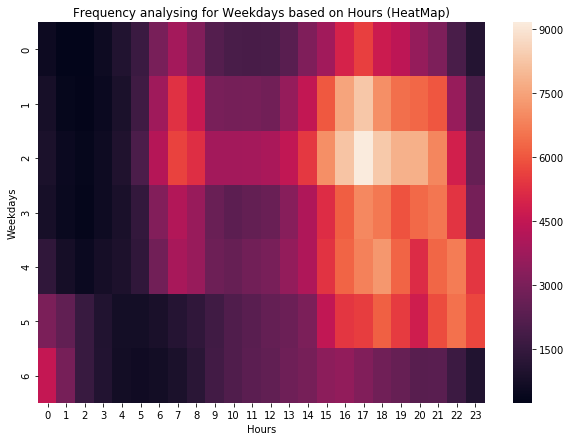

In [67]:
figure(figsize=(10, 7))
seaborn.heatmap(by_cross)
xlabel('Hours')
ylabel('Weekdays')
title('Frequency analysing for Weekdays based on Hours (HeatMap)');



# Analysis of Latitude values

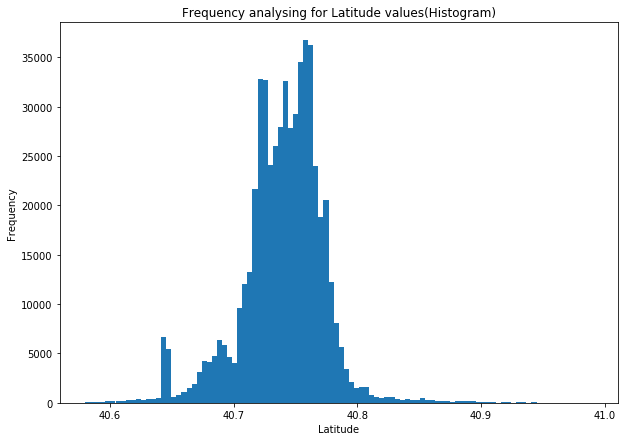

In [76]:
figure(figsize=(10, 7))
hist(data['Lat'], bins=100, range = (40.58, 40.99));
xlabel('Latitude')
ylabel('Frequency')
title('Frequency analysing for Latitude values(Histogram)');


# Analysis of  Longitude values

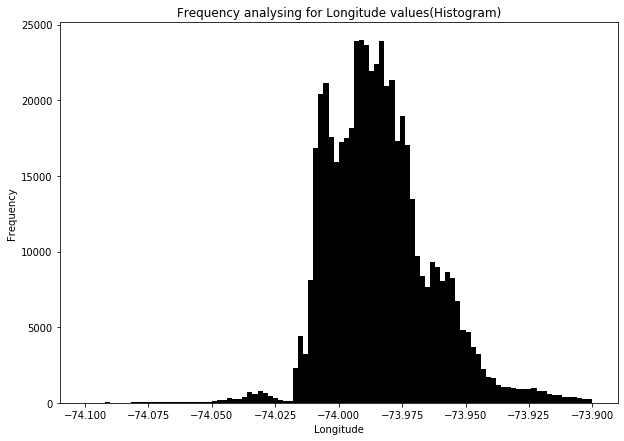

In [91]:
figure(figsize=(10, 7))
hist(data['Lon'], bins=100, range = (-74.1, -73.9),color='black')
xlabel('Longitude')
ylabel('Frequency')
title('Frequency analysing for Longitude values(Histogram)');


# Analysis of Longitude & Latitude values

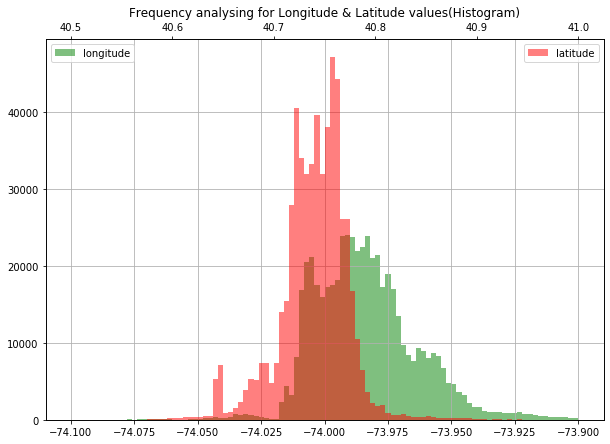

In [81]:
figure(figsize=(10, 7))
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
title('Frequency analysing for Longitude & Latitude values(Histogram)');


# Ploting Latitude and Longitude values

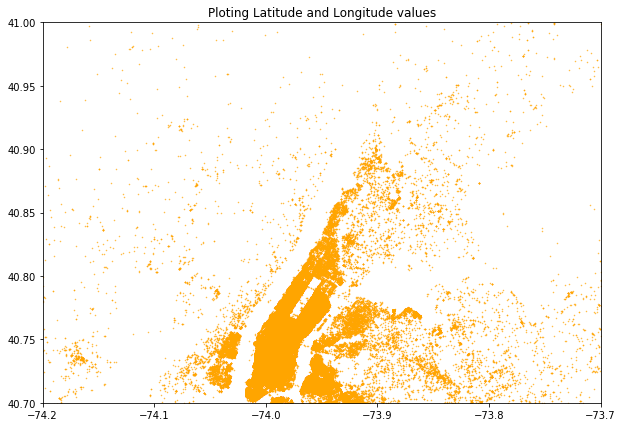

In [88]:
figure(figsize=(10, 7))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.8, color='orange')
xlim(-74.2, -73.7)
ylim(40.7, 41)
title('Ploting Latitude and Longitude values');